In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [4]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [5]:
data.info

<bound method DataFrame.info of      temperature   humidity  wind_speed  solar_irradiance  energy_consumption
0      24.363503  31.107976    5.234114        705.432695          307.398145
1      38.767858  52.514057    4.939576        817.013258          412.444548
2      33.299849  72.376750   18.125092        325.421109          392.072418
3      29.966462  63.933493    4.990924        662.386690          119.254957
4      18.900466  68.393669    5.438995        614.571385          117.162261
..           ...        ...         ...               ...                 ...
995    17.289552  59.417309   17.305915        497.896331          453.828793
996    37.932839  77.396877    3.145464        400.961061          103.721455
997    18.420466  24.137481    6.195757        455.115084          197.529277
998    38.755934  23.423283    5.800911        576.946528          417.085421
999    26.150144  36.931224   17.428281        245.230623          318.790570

[1000 rows x 5 columns]>

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,27.256414,7.303434,15.115801,20.899332,27.420184,33.607990,39.992942
humidity,1000.0,50.421038,17.531394,20.193096,34.464456,51.124034,65.627903,79.964824
wind_speed,1000.0,10.048115,5.813484,0.000233,5.227020,10.012278,15.182071,19.956417
solar_irradiance,1000.0,541.337543,257.840410,100.588052,317.710693,535.851355,763.786729,999.601933
energy_consumption,1000.0,272.347395,129.064474,50.013823,160.238303,272.569144,382.997053,498.987225


In [7]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.shape

(1000, 5)

In [10]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [11]:
data.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
        'energy_consumption'],
       dtype='object')]

In [12]:
data.dtypes

temperature           float64
humidity              float64
wind_speed            float64
solar_irradiance      float64
energy_consumption    float64
dtype: object

In [13]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [14]:
# seperating independent and dependent values
# independent values
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
# dependent values
y = data['energy_consumption'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layers with 64 neuron
    Dense(32, activation='relu'), # Hidden layers with 32 neurons
    Dense(1) # Output layer for regression (1 neuron)
])

C:\Users\siddd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#Mean Squared Error and Mean Absolute Error

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1) 
# verbose = it detailed the ouput

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16164.7939 - mae: 108.8224 - val_loss: 17905.7051 - val_mae: 115.6050
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16502.3457 - mae: 111.2859 - val_loss: 17934.1816 - val_mae: 115.6801
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16925.3281 - mae: 112.7442 - val_loss: 17963.9922 - val_mae: 115.6972
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16424.5078 - mae: 110.6990 - val_loss: 17936.7969 - val_mae: 115.6831
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15245.9082 - mae: 106.2239 - val_loss: 17889.2266 - val_mae: 115.5963
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16653.9434 - mae: 111.2237 - val_loss: 17926.0996 - val_mae: 115.6521
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17273.6113 - mae: 113.7113 - val_loss: 17948.6875 - val_mae: 115.7304
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17412.5527 - mae: 114.8184 - val_loss: 17

In [26]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17805.1133 - mae: 114.8368 
Test Mean Absolute Error: 114.77


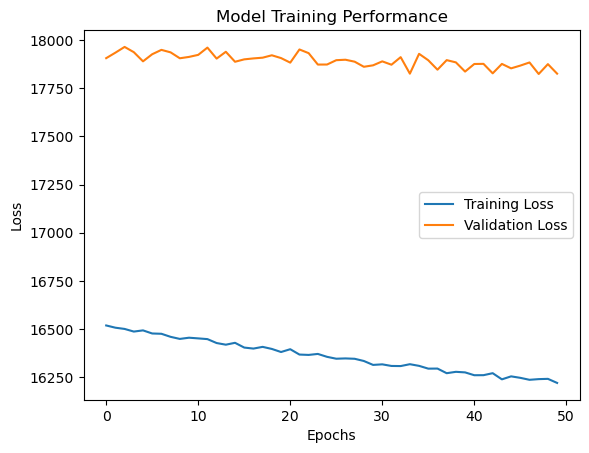

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [28]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[282.28992],
       [258.8988 ],
       [255.80637],
       [234.26947],
       [342.23517],
       [299.39902],
       [309.70844],
       [289.75537],
       [290.17035],
       [272.0205 ],
       [236.6903 ],
       [261.51248],
       [286.7565 ],
       [242.00557],
       [294.95367],
       [312.69754],
       [269.07663],
       [315.74564],
       [294.16376],
       [234.2976 ],
       [276.5481 ],
       [290.08832],
       [268.31686],
       [280.23483],
       [263.04092],
       [252.63675],
       [255.07602],
       [311.28674],
       [308.92032],
       [263.8785 ],
       [249.29807],
       [290.02838],
       [288.0127 ],
       [251.47327],
       [304.6755 ],
       [292.16656],
       [238.49957],
       [254.7489 ],
       [272.91425],
       [239.09415],
       [253.44751],
       [252.41304],
       [250.60757],
       [252.41931],
       [269.09805],
       [250.54015],
       [259.98355],
       [250.48901],
       [286.68372],
       [291.48538],


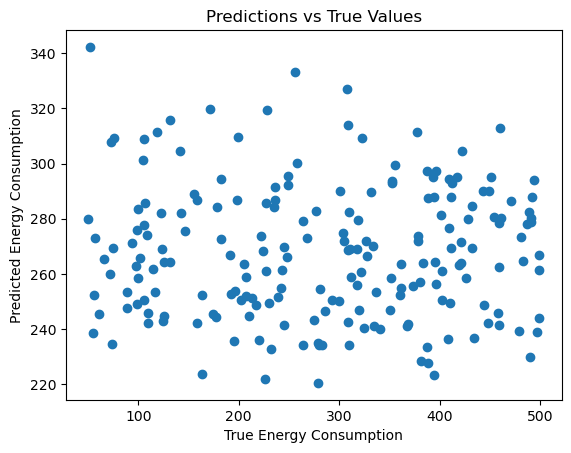

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()